In [ ]:
import tensorflow as tf
import os
import shutil
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [ ]:
#TRAIN_URL = "https://storage.googleapis.com/download.tensorflow.org/data/rps.zip"
#TEST_URL = "https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip"

In [3]:
#train_dir = tf.keras.utils.get_file("/content/drive/My Drive/CNN/SPC/train.zip" , TRAIN_URL)

In [4]:
#test_dir = tf.keras.utils.get_file("/content/drive/My Drive/CNN/SPC/test.zip" , TEST_URL)

In [5]:
#fl1 = zipfile.ZipFile(train_dir , 'r')
#fl2 = zipfile.ZipFile(test_dir , 'r')

In [6]:
os.chdir("/content/drive/My Drive/CNN/SPC")
#os.mkdir("./data")
#fl1.extractall("./data")
#fl2.extractall("./data")

In [7]:
a = tf.keras.preprocessing.image.load_img("/content/drive/My Drive/CNN/SPC/data/rps/paper/paper01-006.png")
a = tf.keras.preprocessing.image.img_to_array(a)
a.shape

(300, 300, 3)

In [8]:
train_dir_ = "/content/drive/My Drive/CNN/SPC/data/rps"
test_dir_  = "/content/drive/My Drive/CNN/SPC/data/rps-test-set"

In [9]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = (1.0 / 255.0) ,
                                                                 height_shift_range = 0.2 ,
                                                                 width_shift_range = 0.2 ,
                                                                 zoom_range = 0.2 ,
                                                                 rotation_range = 20)

test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = (1.0 / 255.0))

In [10]:
train_data = train_data_gen.flow_from_directory(train_dir_ , batch_size = 32 , target_size = (300,300) , class_mode = "categorical")
test_data  = test_data_gen.flow_from_directory(test_dir_ , batch_size = 32 , target_size = (300,300) , class_mode = "categorical")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16 , (3,3) , activation = "relu" , input_shape = (300,300,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32 , (3,3) , activation = "relu" ),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64 , (3,3) , activation = "relu" ),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64 , (3,3) , activation = "relu" ),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(256,activation = "relu"),
    tf.keras.layers.Dense(3 , activation = "softmax")
]) 
model.compile(optimizer = "rmsprop" , loss = tf.keras.losses.categorical_crossentropy , metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
his = model.fit(train_data , steps_per_epoch = train_data.n // train_data.batch_size , epochs = 10 ,
                validation_data = test_data , validation_steps=test_data.n // test_data.batch_size)

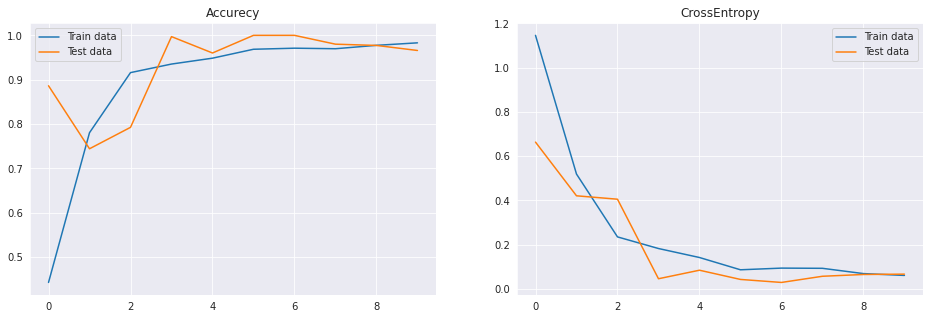

In [69]:
_ , ax = plt.subplots(1 , 2 , figsize = (16,5))

ax[0].plot(his.history['acc'] , label = 'Train data')
ax[0].plot(his.history['val_acc'] , label = 'Test data')
ax[0].set_title("Accurecy")
ax[0].legend()

ax[1].plot(his.history['loss'] , label = 'Train data')
ax[1].plot(his.history['val_loss'] , label = 'Test data')
ax[1].set_title("CrossEntropy")
ax[1].legend()

In [17]:
print("Prediction     : " , model.predict_classes(test_data[0][0][0:5]))
original_label = [i.argmax() for i in test_data[0][1][:5]]
print("Original lebel : " , original_label)

Prediction     :  [0 1 2 1 1]
Original lebel :  [0, 1, 2, 1, 1]


In [20]:
from google.colab import files

In [56]:
files.upload()

Saving s1.jpg to s1.jpg
Saving s2.jpg to s2.jpg
Saving s3.jpg to s3.jpg


{'s1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x05\x00\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x001\x00\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02`q\xeb)\x9a\xcf;\x97\xd7\x93\xe7\xdf\x13\x90\xb9\x96\xbd\xff\x00\x9f\xf7u2\xf3\xfd\x1f>L{\xfc\xee\xf5\xe7\x01D\xfa\xa3\x90\xd7 i\xa8\x9aL\x95J\xb6\x84r\xd1)\x84\xc7EW\x19\xda\x8eZ\xdaRt\x88;/\xceg\xa6\xfc\xea\

In [34]:
pred_class = {}
for k , v in train_data.class_indices.items():
    pred_class[v] = k
pred_class

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [63]:
#os.listdir()

In [110]:
def pred(fls , model = model):
    _ , ax = plt.subplots(2,4,figsize = (24,10))
    count = 0
    for fl in fls:
        img = tf.keras.preprocessing.image.load_img(fl , target_size=(300,300))
        img = tf.keras.preprocessing.image.img_to_array(img)
        #print(img.shape)
        img = img / 255.0
        p = model.predict_classes(img[np.newaxis , :])[0]
        ax[count // 4 , count % 4].imshow(img)
        ax[count // 4 , count % 4].grid(False)
        ax[count // 4 , count % 4].set_title("Prediction : " + pred_class[p])
        count += 1
        a = ax[count // 4 , count % 4].bar([1,2,3] ,model.predict(img[np.newaxis , :])[0] , width = 0.5 , color = "#0005" , tick_label = ['paper', 'rock', 'scissors'])
        a[p].set_color("#1A3B50")
        count += 1

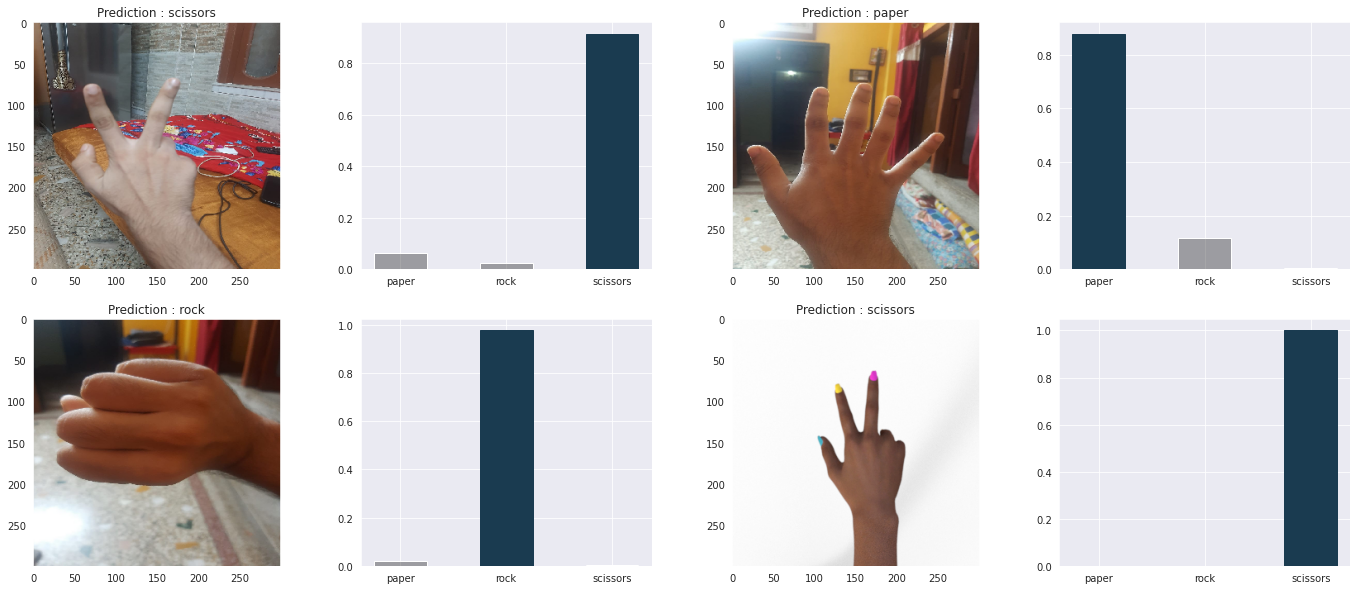

In [111]:
fls = [
    "/content/drive/My Drive/CNN/SPC/s1.jpg",
    "/content/drive/My Drive/CNN/SPC/hand3.jpg",
    "/content/drive/My Drive/CNN/SPC/stone1.jpg",
    "/content/drive/My Drive/CNN/SPC/data/rps-test-set/scissors/testscissors02-07.png"
]
pred(fls)